In [3]:
#농어의 길이와 무게
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42, 1) (14, 1)
(42,) (14,)


1 0.9852830341215901 0.991309195814175


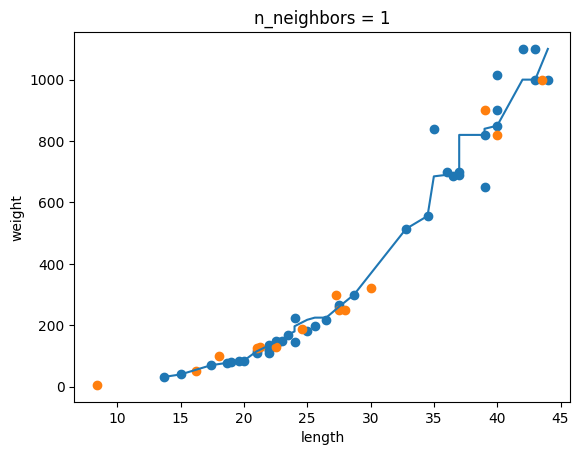

5 0.9698823289099254 0.992809406101064


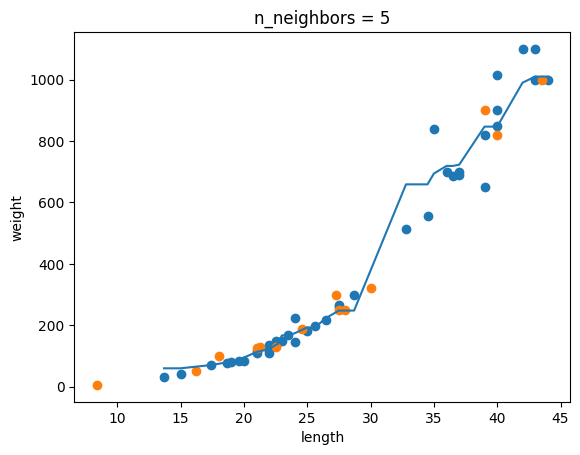

10 0.96164569026043 0.9737908255822255


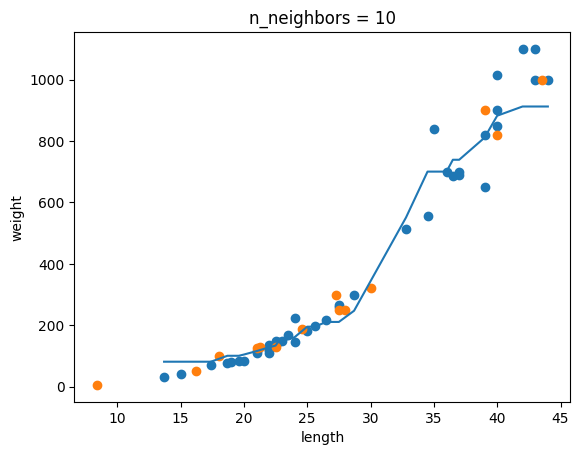

In [6]:
# k-최근접 이웃 회귀 모델의 이웃 값을 1, 5, 10으로 바꿔가며 훈련
# 각 스텝마다 훈련데이터/테스트데이터의 score와 예측값을 구해서 산점도 출력

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

knr = KNeighborsRegressor()

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print(n, knr.score(train_input, train_target), knr.score(test_input, test_target))

    train_prediction = knr.predict(train_input)
    test_prediction = knr.predict(test_input)

    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)

    train_sort = np.column_stack((train_input, train_prediction))
    train_sort_ = np.sort(train_sort, axis=0)
    plt.plot(train_sort_[:,0], train_sort_[:,1])

    plt.xlabel('length')
    plt.ylabel('weight')
    plt.title('n_neighbors = {}'.format(n))
    plt.show()

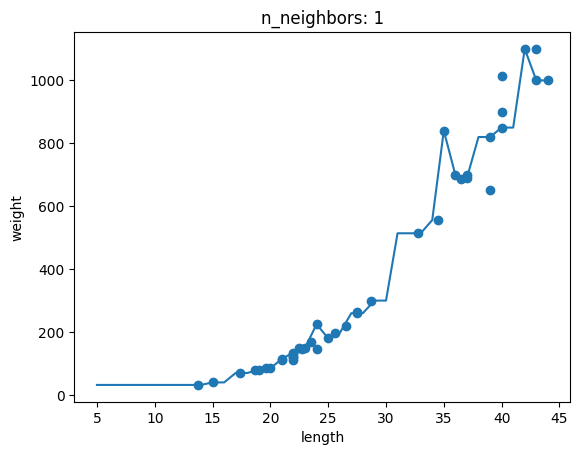

In [8]:
#농어의 길이를 5~45까지 바꿔가며 무게를 예측

knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(train_input, train_target)

x = np.arange(5, 45).reshape(-1, 1)

y_pred = knr.predict(x)

plt.scatter(train_input, train_target)

plt.plot(x, y_pred)

plt.xlabel('length')
plt.ylabel('weight')
plt.title('n_neighbors: 1')
plt.show()
